# Devanagari Character Classification using CNN 

<h3>Context</h3>
This dataset is created for the deep learning based Devanagari character recognition research evaluation, 2015.

<h3>Content</h3>
The dataset contains mixed categories for Devanagari numerals (10 classes) and consonants (36 classes). Dataset is explicitly separated into train and test set. Train set contains total 78,200 samples with 1700 samples per class for total 46 classes and test set contains total 13,800 samples with 300 samples per class for total 46 classes.
Dataset is collected from the school level students.

This dataset is collected and maintained by the following research members,

Shailesh Acharya
Ashok Kumar Pant
Prashnna Kumar Gyawali

In [ ]:
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras # keras is a wrapper on tensorflow

import os
import cv2
import matplotlib.pyplot as plt


In [2]:
path1 = r'E:\Data Science\DataSets and EDA\CNN\Devnagri\dhcd\train'
cate = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17',
        '18','19','20','21','22','23','24','25','26','27','28','29',
        '30','31','32','33','34','35','36','37','38','39','40','41','42','43','44','45'
]

E:\Data Science\DataSets and EDA\CNN\Devnagri\dhcd\train\0
(32, 32, 3)
E:\Data Science\DataSets and EDA\CNN\Devnagri\dhcd\train\1
(32, 32, 3)
E:\Data Science\DataSets and EDA\CNN\Devnagri\dhcd\train\2
(32, 32, 3)
E:\Data Science\DataSets and EDA\CNN\Devnagri\dhcd\train\3
(32, 32, 3)
E:\Data Science\DataSets and EDA\CNN\Devnagri\dhcd\train\4
(32, 32, 3)
E:\Data Science\DataSets and EDA\CNN\Devnagri\dhcd\train\5
(32, 32, 3)
E:\Data Science\DataSets and EDA\CNN\Devnagri\dhcd\train\6
(32, 32, 3)
E:\Data Science\DataSets and EDA\CNN\Devnagri\dhcd\train\7
(32, 32, 3)
E:\Data Science\DataSets and EDA\CNN\Devnagri\dhcd\train\8
(32, 32, 3)
E:\Data Science\DataSets and EDA\CNN\Devnagri\dhcd\train\9
(32, 32, 3)
E:\Data Science\DataSets and EDA\CNN\Devnagri\dhcd\train\10
(32, 32, 3)
E:\Data Science\DataSets and EDA\CNN\Devnagri\dhcd\train\11
(32, 32, 3)
E:\Data Science\DataSets and EDA\CNN\Devnagri\dhcd\train\12
(32, 32, 3)
E:\Data Science\DataSets and EDA\CNN\Devnagri\dhcd\train\13
(32, 32, 3)
E:

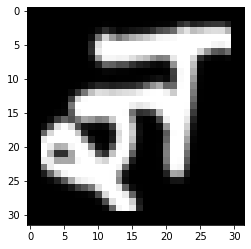

In [5]:
for i in cate:
    folders = os.path.join(path1,i)
    print(folders)
    for image in os.listdir(folders):
        image_path = os.path.join(folders, image)
        image_array = cv2.imread(image_path) # using the cv2 i m read and storing in variable image_array
        plt.imshow(image_array)
        print(image_array.shape)
        break
        

In [6]:
image_size = 100  
                 
path1 = r'E:\Data Science\DataSets and EDA\CNN\Devnagri\dhcd\train'
cate = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17',
        '18','19','20','21','22','23','24','25','26','27','28','29',
        '30','31','32','33','34','35','36','37','38','39','40','41','42','43','44','45']
    
input_image = []    
for i in cate:
    folders = os.path.join(path1 ,i)
    label   = cate.index(i)   # we need to tell software which image is belongs to which category
    for image in os.listdir(folders):
        image_path  = os.path.join(folders , image)
        image_array =  cv2.imread(image_path) #  using the cv2 i am reading the image and storing in variable image_array
        image_array =cv2.resize(image_array , (image_size  , image_size) ) # resizing each image to 50 * 50
        input_image.append([image_array , label])


[[array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), 33], [array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
     

78200

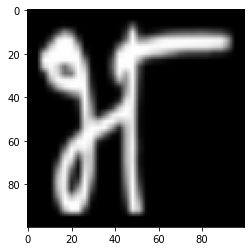

In [32]:
# Since our Dataset is a bit huge and my machine wouldn't  

np.random.shuffle(input_image)

X = []
Y = []
print(input_image[0:1000])
for x_val, labels in input_image[0:1000]:
    X.append(x_val)
    Y.append(labels)
    
X = np.array(X)
Y = np.array(Y)

X = X/255

plt.imshow(X[0])
len(input_image)

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2)

In [30]:
# print(X_train.shape)
# print(Y_train.shape)

# Y = to_categorical(Y)
print(X.shape[1:])
len(Y[1])

(100, 100, 3)


46

In [35]:
model = Sequential() # modelis initialized
model.add(Conv2D(filters = 30, kernel_size = (5, 5), activation= 'relu',)) # Input/convolution layer Info, filters(sliders/kernels)
model.add(MaxPool2D(pool_size=(2,2))) 
model.add(Flatten())

model.add(Dense(128, activation= 'relu', input_shape = X.shape[1:])) # Hidden Layer
# model.add(Dropout(0.2))
model.add(Dense(46, activation='softmax'))

# adam = tf.keras.optimizers.Adam(lr = 0.01) # its not mandatory default is 0.001

model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics = ['accuracy'])
 # 10 is not a hyper parameter
# number of layers in target variable

In [42]:
model.fit(X, Y, epochs=10, validation_split=.2)

Epoch 1/10
25/25 [==============================] - 4s 173ms/step - loss: 0.8991 - accuracy: 0.7625 - val_loss: 2.2907 - val_accuracy: 0.4150
Epoch 2/10
25/25 [==============================] - 4s 171ms/step - loss: 0.3272 - accuracy: 0.9200 - val_loss: 2.1959 - val_accuracy: 0.4400
Epoch 3/10
25/25 [==============================] - 4s 171ms/step - loss: 0.0877 - accuracy: 0.9862 - val_loss: 2.5372 - val_accuracy: 0.4650
Epoch 4/10
25/25 [==============================] - 4s 171ms/step - loss: 0.0387 - accuracy: 0.9950 - val_loss: 2.3728 - val_accuracy: 0.5200
Epoch 5/10
25/25 [==============================] - 4s 172ms/step - loss: 0.0121 - accuracy: 1.0000 - val_loss: 2.5359 - val_accuracy: 0.5300
Epoch 6/10
25/25 [==============================] - 4s 171ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 2.4573 - val_accuracy: 0.5400
Epoch 7/10
25/25 [==============================] - 5s 194ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 2.5437 - val_accuracy: 0.5350
Epoch 

In [43]:
pred = model.predict(X)

pred = np.argmax(pred, axis=1)

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report

tab = confusion_matrix(Y, pred)
print(accuracy_score(Y, pred))
print(classification_report(Y, pred))

0.907
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       0.90      1.00      0.95        19
           2       0.96      0.92      0.94        26
           3       0.71      0.94      0.81        16
           4       0.72      0.81      0.76        16
           5       0.96      1.00      0.98        23
           6       1.00      0.86      0.93        22
           7       0.95      0.95      0.95        22
           8       0.96      0.96      0.96        24
           9       0.93      0.96      0.95        28
          10       0.93      0.93      0.93        15
          11       0.94      0.77      0.85        22
          12       0.85      0.94      0.89        18
          13       1.00      0.81      0.89        21
          14       0.90      0.70      0.79        27
          15       0.83      1.00      0.91        24
          16       0.95      0.77      0.85        26
          17       0.

<h3>Conclusion : </h3>We have managed to achieve a <b>Precision : 91% and Accuracy : 91%</b>